# Visualizing The Most Stared Python Projects on Github Using Github's API


This project focuses on identifying the most-starred Python repositories on GitHub. By leveraging the GitHub API, the project retrieves data about various repositories, including their star count, name, and description. The data is fetched using a GET request to the GitHub API, and the response is processed using Python's json() method to parse the JSON-formatted data.

Once the data is obtained, the star counts and repository names are extracted and analyzed. To visualize the results, plotly.express is used to create a bar chart, which illustrates the popularity of Python projects on GitHub by their star count.



# Installing Requests

The Requests package allows a Python program to easily request information  
from a website and examine the response. Use pip to install Requests:

In [7]:
pip install --user requests

Note: you may need to restart the kernel to use updated packages.


### Processing an API Response

In [177]:
# import the request library
import plotly.express as px
import requests
import json

In [8]:
## maikng an API call and checking the response

#main part of the url
url = "https://api.github.com/search/repositories"
# query string. NB: could be added to url but breaking it into two is more cleaner
url +="?q=language:python+sort:stars+stars:>10000"

headers = {"Accept":"application/vnd.github.v3+json"}
r = requests.get(url, headers = headers)

print(f"Status code: {r.status_code}")

Status code: 200


In [10]:
# Convert the response object to a dictionary.
response_dict = r.json()

In [18]:
#Process results.
print(response_dict.keys())

dict_keys(['total_count', 'incomplete_results', 'items'])


In [105]:
#[name["full_name"] for name in response_dict['items']]

### Working with the Response Dictionary


In [114]:
print(f"Total repositories: {response_dict['total_count']}")
print(f"Complete results: {not response_dict['incomplete_results']}")

Total repositories: 536
Complete results: True


In [116]:
## Explore the information about the repositories
repo_dicts = response_dict["items"]
print(f"Repositories returned: {len(repo_dicts)}")

Repositories returned: 30


In [146]:
repo_dicts

[{'id': 54346799,
  'node_id': 'MDEwOlJlcG9zaXRvcnk1NDM0Njc5OQ==',
  'name': 'public-apis',
  'full_name': 'public-apis/public-apis',
  'private': False,
  'owner': {'login': 'public-apis',
   'id': 51121562,
   'node_id': 'MDEyOk9yZ2FuaXphdGlvbjUxMTIxNTYy',
   'avatar_url': 'https://avatars.githubusercontent.com/u/51121562?v=4',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/public-apis',
   'html_url': 'https://github.com/public-apis',
   'followers_url': 'https://api.github.com/users/public-apis/followers',
   'following_url': 'https://api.github.com/users/public-apis/following{/other_user}',
   'gists_url': 'https://api.github.com/users/public-apis/gists{/gist_id}',
   'starred_url': 'https://api.github.com/users/public-apis/starred{/owner}{/repo}',
   'subscriptions_url': 'https://api.github.com/users/public-apis/subscriptions',
   'organizations_url': 'https://api.github.com/users/public-apis/orgs',
   'repos_url': 'https://api.github.com/users/public-apis/repos',


In [130]:
## Examine the first repository
repo_dict = repo_dicts[0]
print(f"\nkeys: {len(repo_dict)}")

for key in sorted(repo_dict.keys()):
    print(key)


keys: 80
allow_forking
archive_url
archived
assignees_url
blobs_url
branches_url
clone_url
collaborators_url
comments_url
commits_url
compare_url
contents_url
contributors_url
created_at
default_branch
deployments_url
description
disabled
downloads_url
events_url
fork
forks
forks_count
forks_url
full_name
git_commits_url
git_refs_url
git_tags_url
git_url
has_discussions
has_downloads
has_issues
has_pages
has_projects
has_wiki
homepage
hooks_url
html_url
id
is_template
issue_comment_url
issue_events_url
issues_url
keys_url
labels_url
language
languages_url
license
merges_url
milestones_url
mirror_url
name
node_id
notifications_url
open_issues
open_issues_count
owner
private
pulls_url
pushed_at
releases_url
score
size
ssh_url
stargazers_count
stargazers_url
statuses_url
subscribers_url
subscription_url
svn_url
tags_url
teams_url
topics
trees_url
updated_at
url
visibility
watchers
watchers_count
web_commit_signoff_required


### printing out some useful insights 

In [142]:
print("\n\tSelected information about first repository: ")

print(f"Name: {repo_dict['name']}")
print(f"Owner: {repo_dict['owner']['login']}")
print(f"Stars: {repo_dict['stargazers_count']}")
print(f"Repository: {repo_dict['html_url']}")
print(f"Created: {repo_dict['created_at']}")
print(f"Updated: {repo_dict['updated_at']}")
print(f"Description: {repo_dict['description']}")


	Selected information about first repository: 
Name: public-apis
Owner: public-apis
Stars: 311932
Repository: https://github.com/public-apis/public-apis
Created: 2016-03-20T23:49:42Z
Updated: 2024-09-10T22:09:43Z
Description: A collective list of free APIs


## Summarizing the Top Repositories

In [161]:
print("\nSelected information about each repository:")
for repo_dict in repo_dicts:
    print(f"\tName: {repo_dict['name']}")
    print(f"Owner: {repo_dict['owner']['login']}")
    print(f"Stars: {repo_dict['stargazers_count']}")
    print(f"Repository: {repo_dict['html_url']}")
    print(f"Description: {repo_dict['description']}")


Selected information about each repository:
	Name: public-apis
Owner: public-apis
Stars: 311932
Repository: https://github.com/public-apis/public-apis
Description: A collective list of free APIs
	Name: system-design-primer
Owner: donnemartin
Stars: 269049
Repository: https://github.com/donnemartin/system-design-primer
Description: Learn how to design large-scale systems. Prep for the system design interview.  Includes Anki flashcards.
	Name: awesome-python
Owner: vinta
Stars: 218213
Repository: https://github.com/vinta/awesome-python
Description: An opinionated list of awesome Python frameworks, libraries, software and resources.
	Name: Python
Owner: TheAlgorithms
Stars: 184011
Repository: https://github.com/TheAlgorithms/Python
Description: All Algorithms implemented in Python
	Name: AutoGPT
Owner: Significant-Gravitas
Stars: 166374
Repository: https://github.com/Significant-Gravitas/AutoGPT
Description: AutoGPT is the vision of accessible AI for everyone, to use and to build on. Our

## create variables to hold useful information needed for visualization

In [171]:
repo_names, stars = [],[]

for repo_dict in repo_dicts:
    repo_names.append(repo_dict['name'])
    stars.append(repo_dict['stargazers_count'])  

### visualize the extracted information from the loo using plotly


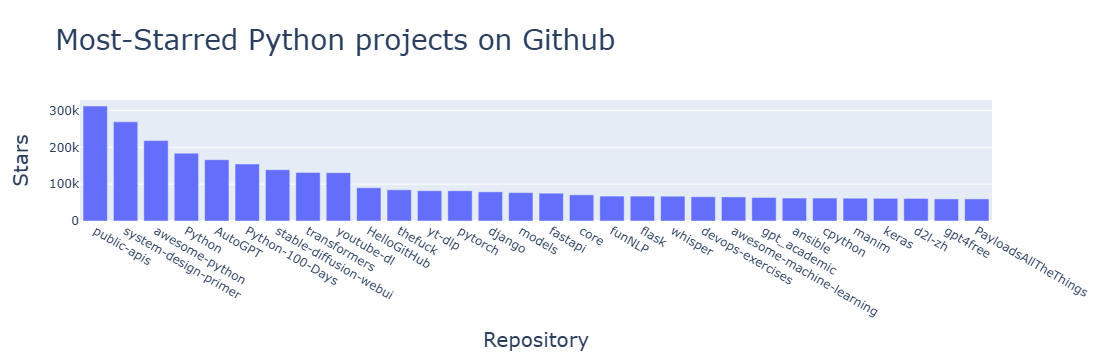

In [199]:
## make a bar graph with plotly
x= repo_names
y = stars
title = 'Most-Starred Python projects on Github'
labels = {'x':'Repository', 'y': 'Stars'}
fig = px.bar(x=x, y=y,
            title = title, labels = labels)
fig.update_layout(title_font_size = 28, xaxis_title_font_size = 20, yaxis_title_font_size =20)

fig.show()


## Adding a custom toolpis

In Plotly, you can hover the cursor over an individual bar to show the information the bar represents. This is commonly called a tooltip, and in this 
case, it currently shows the number of stars a project has.

In [225]:
repo_names, stars,hover_texts = [],[],[]

for repo_dict in repo_dicts:
    repo_names.append(repo_dict['name'])
    stars.append(repo_dict['stargazers_count'])  

    # Build hover text
    owner = repo_dict['owner']['login']
    description = repo_dict['description']
    hover_text = f"{owner}<br />{description}"
    hover_texts.append(hover_text)

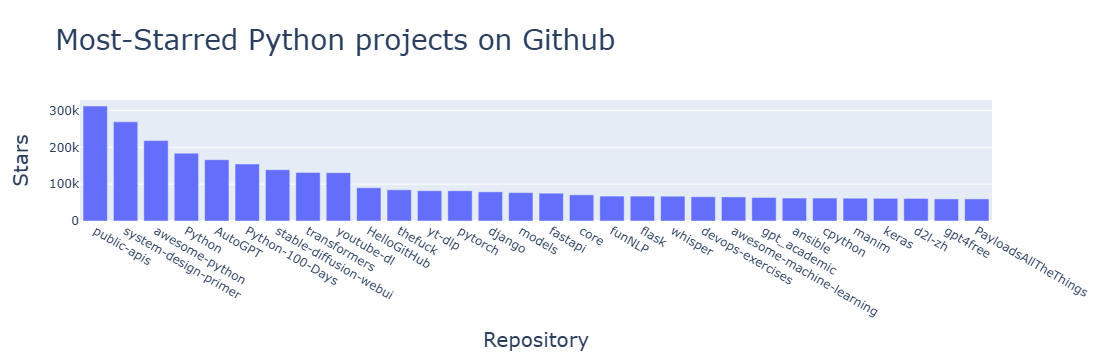

In [227]:
fig = px.bar(x=x, y=y,
            title = title, labels = labels, hover_name = hover_texts)
fig.update_layout(title_font_size = 28, xaxis_title_font_size = 20, yaxis_title_font_size =20)

fig.show()


## Adding clickable links

In [236]:
# process repository information
repo_links, stars, hover_texts = [], [], []

for repo_dict in repo_dicts:
    # Turn repo names into active links
    repo_name = repo_dict["name"]
    repo_url = repo_dict["html_url"]
    repo_link = f"<a href= '{repo_url}'>{repo_name}</a>"
    repo_links.append(repo_link)
    ##Build hover texts
    owner = repo_dict['owner']['login']
    description = repo_dict['description']
    hover_text = f"{owner}<br />{description}"
    hover_texts.append(hover_text)

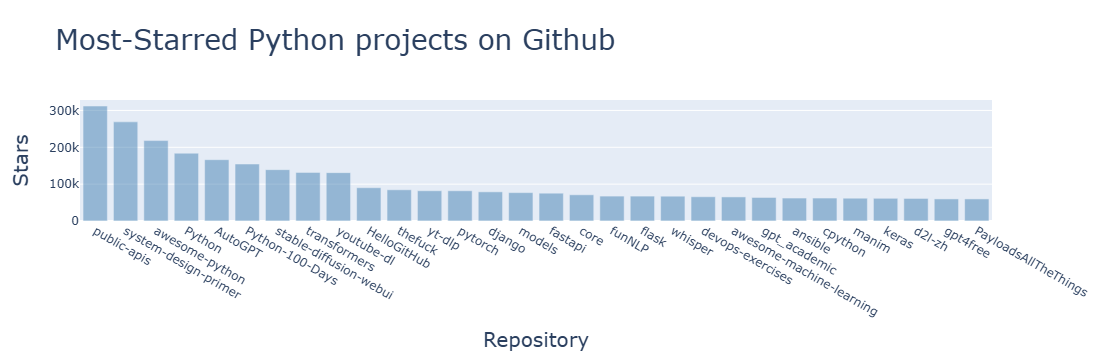

In [250]:
## visualize
fig = px.bar(x=repo_links, y=y,
            title = title, labels = labels, hover_name = hover_texts)

fig.update_layout(title_font_size=28, xaxis_title_font_size=20,
 yaxis_title_font_size=20)

fig.update_traces(marker_color='SteelBlue', marker_opacity=0.5)

fig.show()

## Short Discussion

The resulting plot provides a quick overview of which Python repositories are most favored by the GitHub community, with repositories like public-apis, Python, Auto-GPT, and system-design-primer among the top entries. This visualization helps identify trends in the Python ecosystem, popular libraries, and tools that are widely used by developers worldwide.